# Analysis of age

In [1]:
%run setup.py

In [2]:
df_Invited = pd.read_csv(os.path.join(filepath,'factInvited.csv'))
df_Proceedings = pd.read_csv(os.path.join(filepath,'factProceedings.csv'))

df_Invited.head()

,Full name,Year,Conference (short),First name,Middle name,Last name,gender,Paper Count,Max Paper Count,First year paper,Age,Conference (long),Main Topic,Productivity
0,Alex Sandy Pentland,2004,AAAI,Alex,Sandy,Pentland,M,206,425,1982,22,AAAI Conference on Artificial Intelligence,Artificial Intelligence,9.363636
1,Astro Teller,2004,AAAI,Astro,NaN,Teller,M,8,8,1994,10,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.800000
2,Daniel J. Clancy,2004,AAAI,Daniel,J.,Clancy,M,8,9,1996,8,AAAI Conference on Artificial Intelligence,Artificial Intelligence,1.000000
3,Edward Feigenbaum,2004,AAAI,Edward,NaN,Feigenbaum,M,39,44,1961,43,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.906977
4,Ian Lane Davis,2004,AAAI,Ian,Lane,Davis,M,1,3,1995,9,AAAI Conference on Artificial Intelligence,Artificial Intelligence,0.111111


### Define function

In [3]:
def plot_hist(list1,list1_label, list2,list2_label,fig_title,n_bins):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Academic age at the time of the conference',fontsize=16)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title('Historgram of age',fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=12)
    
    # Prepare data for log-log histogram
    bins = np.logspace(np.log10(min(list1)), np.log10(max(list1)), 20)
    hist,edges = np.histogram(list1, bins=bins, density=True)
    x = (edges[1:]+edges[:-1])/2.

    bins1 = np.logspace(np.log10(min(list2)), np.log10(max(list2)), 20)
    hist1,edges1 = np.histogram(list2, bins=bins1, density=True)
    x1 = (edges1[1:]+edges1[:-1])/2.
    
    xx,yy = zip(*[(i,j) for (i,j) in zip(x,hist) if j>0])
    xx1,yy1 = zip(*[(i,j) for (i,j) in zip(x1,hist1) if j>0])

    ax2.plot(xx, yy, label=list1_label,marker='.')
    ax2.plot(xx1, yy1, label=list2_label,marker='.')
    ax2.set_xlabel('Academic age at the time of the conference',fontsize=16)
    ax2.set_ylabel('Probability Density',fontsize=16)
    ax2.set_title('log-log Age',fontsize=19)
    ax2.legend(loc='upper right',fontsize=13)
    ax2.set_xscale('log')
    ax2.set_yscale('log')
    ax2.tick_params(axis='both', labelsize=12)   
    
    fig.suptitle(fig_title, fontsize=14)
    
    plt.show()

In [16]:
def single_plot_hist(list1,list1_label, list2,list2_label,n_bins,title,fig_name,image_path=image_path):
    fig, (ax1) = plt.subplots(1, 1, figsize=(5, 4.5))

    bins=np.histogram(np.hstack((list1,list2)), bins=n_bins)[1]
    
    ax1.hist(list1, bins=bins, alpha=0.7, label=list1_label,density=True)
    ax1.hist(list2, bins=bins, alpha=0.7, label=list2_label,density=True)
    ax1.set_xlabel('Academic age',fontsize=17)
    ax1.set_ylabel('Density',fontsize=16)
    ax1.set_title("Dist. of seniority for " +title,fontsize=19)
    ax1.legend(loc='upper right',fontsize=13)
    ax1.tick_params(axis='both', labelsize=14)
    
    plt.savefig(image_path+fig_name,bbox_inches='tight')
    plt.show()

## Histogram between invited/proceedings

In [17]:
# Create lists
age_pro = df_Proceedings['Age'].values
age_inv = df_Invited['Age'].values

# drop all the rows with 0 paper count
age_inv = age_inv[age_inv != 0]
age_pro = age_pro[age_pro != 0]

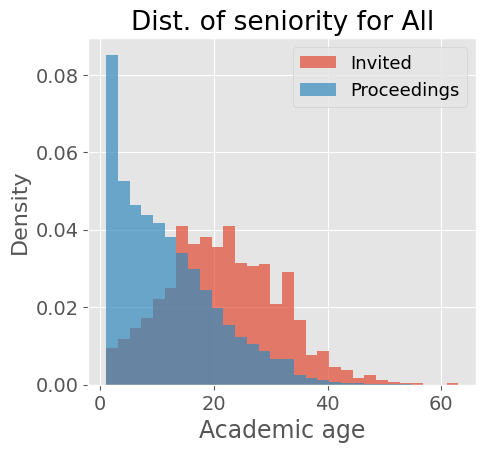

In [18]:
# def single_plot_hist(list1,list1_label, list2,list2_label,n_bins,title,fig_name,image_path=image_path):
single_plot_hist(age_inv,'Invited',age_pro,'Proceedings',30,"All",'Hist_age_inv_pro.pdf')

## Histogram between females and males

In [7]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
age_male = list(df_Proceedings[df_Proceedings['gender'] == 'M']['Age'].values) + list(df_Invited[df_Invited['gender'] == 'M']['Age'].values)
age_female = list(df_Proceedings[df_Proceedings['gender'] == 'F']['Age'].values) + list(df_Invited[df_Invited['gender'] == 'F']['Age'].values)

# drop all the rows with 0 paper count
age_male = [x for x in age_male if x != 0]
age_female = [x for x in age_female if x != 0]

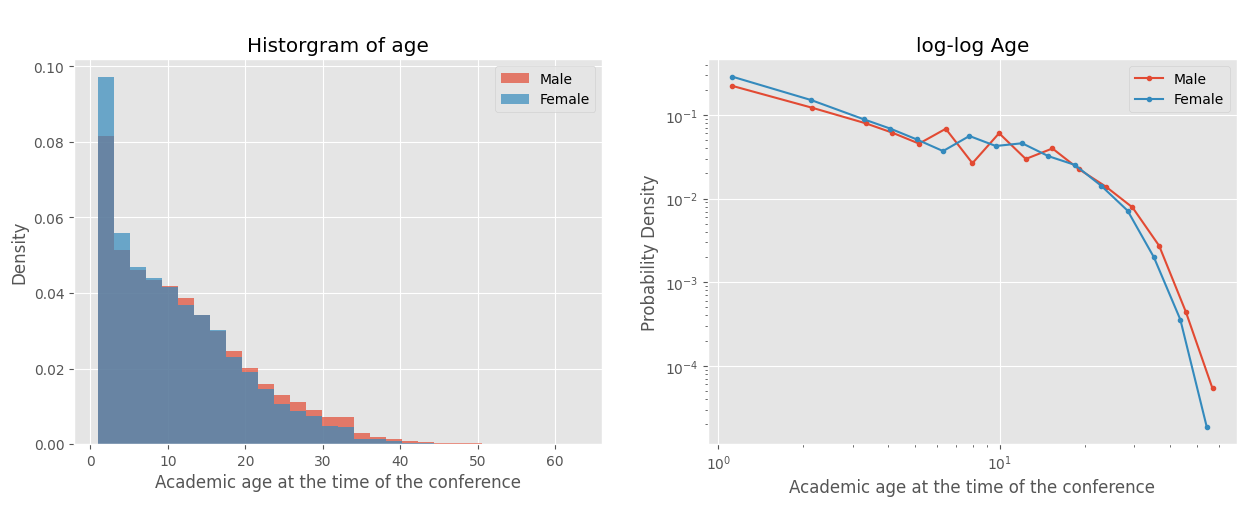

In [8]:
plot_hist(age_male,'Male',age_female,'Female',' ',30)

There is hardly any difference, although male continues for a longer period than females. The plot is heavely dominated by the proceedings. 

## Histogram between females and males for invited

In [19]:
# combine the values from Paper Count column from both the dataframes (df_Invited and df_Proceedings) where the gender column is "M" 
age_male_inv = df_Invited[df_Invited['gender'] == 'M']['Age'].values
age_female_inv = df_Invited[df_Invited['gender'] == 'F']['Age'].values

# drop all the rows with 0 paper count
age_male_inv = age_male_inv[age_male_inv != 0]
age_female_inv = age_female_inv[age_female_inv != 0]

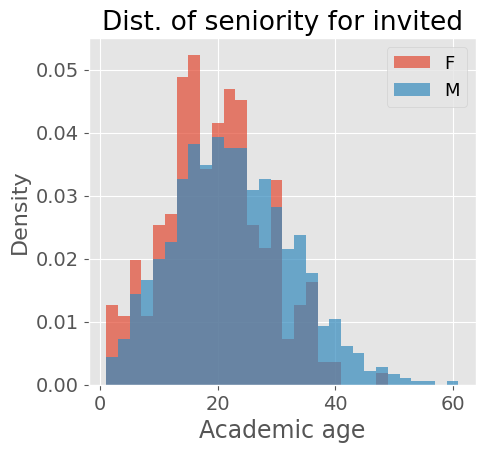

In [20]:
single_plot_hist(age_female_inv,'F',age_male_inv,'M',30,'invited','Hist_age_gender_inv.pdf')

## Histogram between females and males for proceedings

In [21]:
age_male_pro = df_Proceedings[df_Proceedings['gender'] == 'M']['Age'].values
age_female_pro = df_Proceedings[df_Proceedings['gender'] == 'F']['Age'].values

# drop all the rows with 0 paper count
age_male_pro = age_male_pro[age_male_pro != 0]
age_female_pro = age_female_pro[age_female_pro != 0]

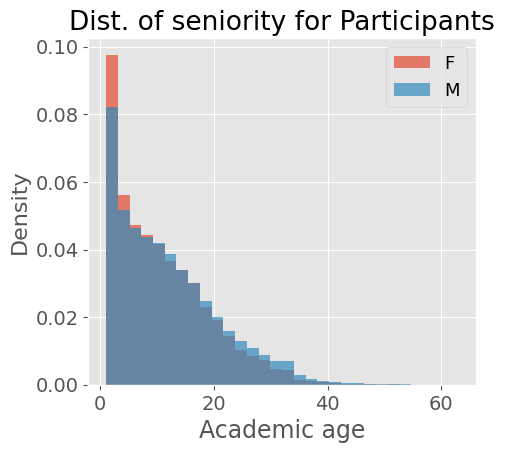

In [22]:
single_plot_hist(age_female_pro,'F',age_male_pro,'M',30,'Participants','Hist_age_gender_pro.pdf')

## Histogram per field

### Define function

In [28]:
def get_field_lists(df,field):
    df = df[df['Main Topic'] == field]
    list_M = df[df['gender'] == "M"]['Age'].values
    list_F = df[df['gender'] == "F"]['Age'].values
    
    list_M = list_M[list_M != 0]
    list_F = list_F[list_F != 0]
    return list_M,list_F

conference_list = list(df_Invited['Main Topic'].unique())
conference_list = [item for item in conference_list if item != 'Computer Architecture']

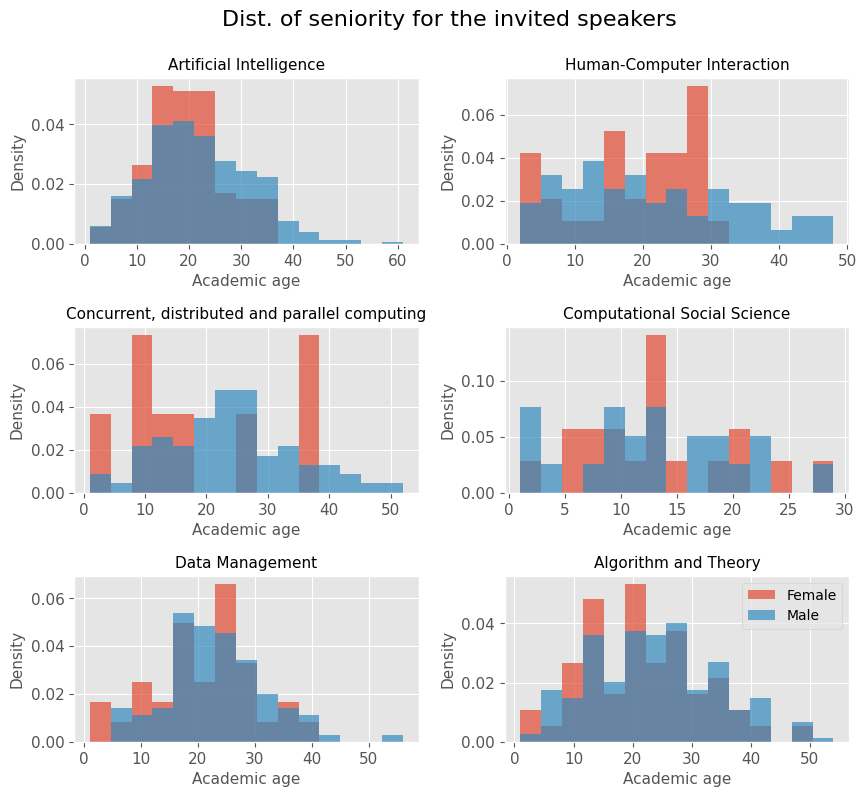

In [41]:
fig = plt.figure(figsize=(10, 17))
plt.subplots_adjust(top=0.94,hspace=0.5, wspace=0.25)

for n, field in enumerate(conference_list):
    ax = plt.subplot(len(conference_list), 2, n + 1)
    
    paper_male_inv_field, paper_female_inv_field = get_field_lists(df_Invited, field)
    
    bins=np.histogram(np.hstack((paper_female_inv_field,paper_male_inv_field)), bins=15)[1]
    
    ax.hist(paper_female_inv_field, bins=bins, alpha=0.7, label='Female',density=True)
    ax.hist(paper_male_inv_field, bins=bins, alpha=0.7, label='Male',density=True)
    ax.set_xlabel('Academic age',fontsize=11)
    ax.set_ylabel('Density',fontsize=11)
    ax.set_title(field,fontsize=11)

    ax.tick_params(axis='both', labelsize=11)
fig.suptitle('Dist. of seniority for the invited speakers', fontsize=16)
plt.legend()
plt.savefig(image_path+'Hist_age_inv_field_all.pdf',bbox_inches='tight')
plt.show()

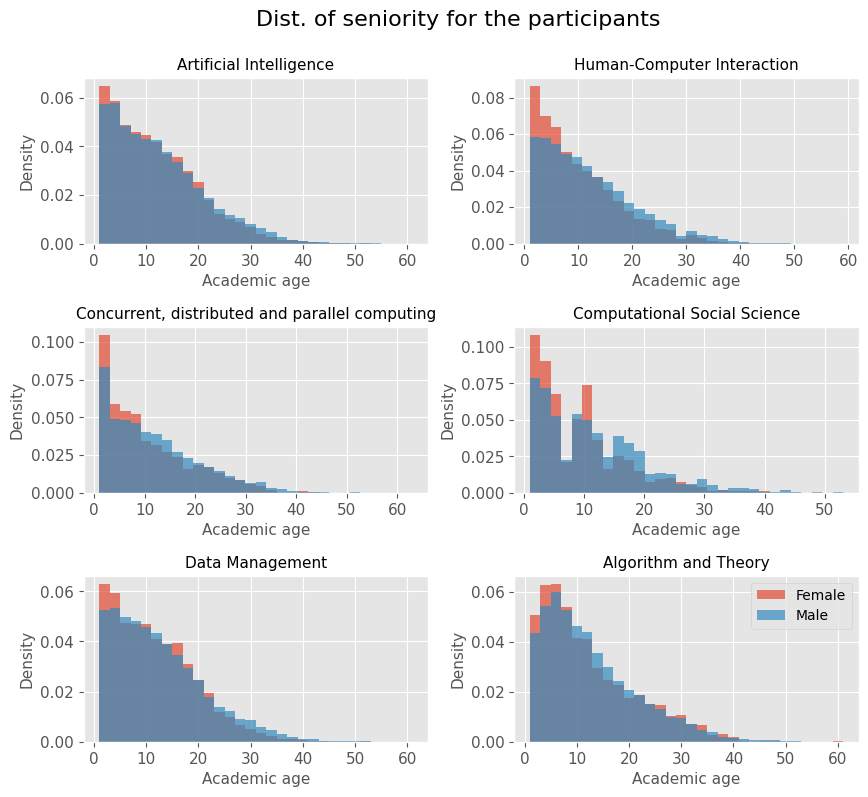

In [42]:
fig = plt.figure(figsize=(10, 17))
plt.subplots_adjust(top=0.94,hspace=0.5, wspace=0.25)

for n, field in enumerate(conference_list):
    ax = plt.subplot(len(conference_list), 2, n + 1)
    
    paper_male_pro_field, paper_female_pro_field = get_field_lists(df_Proceedings, field)
    
    bins=np.histogram(np.hstack((paper_female_pro_field,paper_male_pro_field)), bins=30)[1]
    
    ax.hist(paper_female_pro_field, bins=bins, alpha=0.7, label='Female',density=True)
    ax.hist(paper_male_pro_field, bins=bins, alpha=0.7, label='Male',density=True)
    ax.set_xlabel('Academic age',fontsize=11)
    ax.set_ylabel('Density',fontsize=11)
    ax.set_title(field,fontsize=11)

    ax.tick_params(axis='both', labelsize=11)
fig.suptitle('Dist. of seniority for the participants', fontsize=16)
plt.legend()
plt.savefig(image_path+'Hist_age_pro_field_all.pdf',bbox_inches='tight')
plt.show()